In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

import seaborn as sns

In [4]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('fifa.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
#checking rows and columns 
df.shape

(18207, 60)

In [7]:
num_df = df.select_dtypes(include=['int64', 'float64'])
num_df.shape

(18207, 42)

In [8]:
cat_df = df.select_dtypes(include=['object'])
cat_df.shape

(18207, 18)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,18207.0,214298.338606,29965.244204,16.0,200315.5,221759.0,236529.5,246620.0
Age,18207.0,25.122206,4.669943,16.0,21.0,25.0,28.0,45.0
Overall,18207.0,66.238699,6.908930,46.0,62.0,66.0,71.0,94.0
Potential,18207.0,71.307299,6.136496,48.0,67.0,71.0,75.0,95.0
International Reputation,18159.0,1.113222,0.394031,1.0,1.0,1.0,1.0,5.0
Weak Foot,18159.0,2.947299,0.660456,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308,0.756164,1.0,2.0,2.0,3.0,5.0
Jersey Number,18147.0,19.546096,15.947765,1.0,8.0,17.0,26.0,99.0
Crossing,18159.0,49.734181,18.364524,5.0,38.0,54.0,64.0,93.0
Finishing,18159.0,45.550911,19.525820,2.0,30.0,49.0,62.0,95.0


In [11]:
df.describe(include='O')

,Name,Photo,Nationality,Flag,Club,Club Logo,Value,Wage,Preferred Foot,Work Rate,Body Type,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause
count,18207,18207,18207,18207,17966,18207,18207,18207,18159,18159,18159,18147,16654,1264,17918,18159,18159,16643
unique,17194,18207,164,164,651,679,217,144,2,9,10,27,1736,341,36,21,57,1244
top,J. Rodríguez,https://cdn.sofifa.org/players/4/19/158023.png,England,https://cdn.sofifa.org/flags/14.png,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€1.1M,€1K,Right,Medium/ Medium,Normal,ST,"Jul 1, 2018",Atalanta,2019,6'0,165lbs,€1.1M
freq,11,1,1662,1662,33,33,431,4900,13948,9810,10595,2152,1538,20,4819,2881,1483,557


In [12]:
#dropping the redundant columns
df.drop(['Photo', 'Flag', 'Club Logo', 'Body Type', 'Jersey Number'], axis=1, inplace=True)

In [13]:
#checking columns after dropping the redundant columns
df.shape

(18207, 55)

In [14]:
df[['Wage', 'Value', 'Release Clause']].head()

,Wage,Value,Release Clause
0,€565K,€110.5M,€226.5M
1,€405K,€77M,€127.1M
2,€290K,€118.5M,€228.1M
3,€260K,€72M,€138.6M
4,€355K,€102M,€196.4M


In [15]:
def convert(data):
    if data == np.nan:
        new_data = float(0)
    else:
        data = str(data).replace('€', '')
        if data[-1] == 'K':
            new_data = float(str(data).replace('K', ''))*1000
        else:
            new_data = float(str(data).replace('M', ''))*1000000
            
    return new_data

In [16]:
df['Wage'] = df['Wage'].apply(lambda x: convert(x))
df['Value'] = df['Value'].apply(lambda x: convert(x))
df['Release Clause'] = df['Release Clause'].fillna('0').apply(lambda x: convert(x))

In [17]:
df[['Wage', 'Value', 'Release Clause']].head()

,Wage,Value,Release Clause
0,565000.0,110500000.0,226500000.0
1,405000.0,77000000.0,127100000.0
2,290000.0,118500000.0,228100000.0
3,260000.0,72000000.0,138600000.0
4,355000.0,102000000.0,196400000.0


In [19]:
#checking joined column value
df['Joined'].head()

0     Jul 1, 2004
1    Jul 10, 2018
2     Aug 3, 2017
3     Jul 1, 2011
4    Aug 30, 2015
Name: Joined, dtype: object

In [20]:
#removing date and month from joined column
df['Joined'] = df['Joined'].str.split().str.get(2).fillna(0).astype(int)

In [21]:
df['Joined'].head()

0    2004
1    2018
2    2017
3    2011
4    2015
Name: Joined, dtype: int32

In [22]:
#converting contract valid until column to datetime format
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'])

In [23]:
df['Contract Valid Until'].head()

0   2021-01-01
1   2022-01-01
2   2022-01-01
3   2020-01-01
4   2023-01-01
Name: Contract Valid Until, dtype: datetime64[ns]

In [24]:
#height column
df['Height'].head()

0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
Name: Height, dtype: object

In [25]:
#converting to float with decimal function
def height_convert(data):
    if data is not None:
        return float(str(data).replace("'", '.'))

In [26]:
#apply height_convert function
df['Height'] = df['Height'].apply(height_convert)

In [27]:
df['Height'].head()

0    5.70
1    6.20
2    5.90
3    6.40
4    5.11
Name: Height, dtype: float64

In [28]:
df['Weight'].head()

0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object

In [29]:
#converting weight column to float and remove lbs
df['Weight'] = df['Weight'].fillna(0).apply(lambda x: str(x).replace('lbs', '')).astype(float)

In [30]:
df['Weight'].head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

In [31]:
#checking missing values percentage
df.isnull().sum()/len(df)*100

ID                           0.000000
Name                         0.000000
Age                          0.000000
Nationality                  0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.323667
Value                        0.000000
Wage                         0.000000
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Position                     0.329544
Joined                       0.000000
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight                       0.000000
Crossing                     0.263635
Finishing                    0.263635
HeadingAccuracy              0.263635
ShortPassing                 0.263635
Volleys                      0.263635
Dribbling                    0.263635
Curve       

In [32]:
#dropping Loaned_from column because it has 93% missing values
df.drop('Loaned From', axis=1, inplace=True)

In [33]:
#filling null values with median in numerical_column and mode in categorical_column
missing_values = df.isnull().sum()/len(df)

index = [i   for i in missing_values[missing_values>0].index]

numerical_columns = [i   for i in index   if i in df.columns and  df[i].dtype!=object]
categorical_columns = [i   for i in index   if i in df.columns and  df[i].dtype==object]

for columns in numerical_columns:
    df[columns] = df[columns].fillna(df[columns].median())
    
for columns in categorical_columns:
    df[columns] = df[columns].fillna(df[columns].mode()[0])

In [34]:
df.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance   

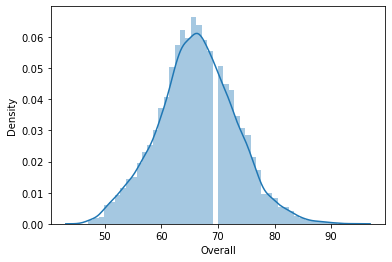

In [35]:
#distribution plot of Overall rating column
sns.distplot(df['Overall'])
plt.show()

1. Overall ranges from 45 to 95.
2. Maximum players having overall rating between 60 to 70.

In [36]:
#top20 players based on highest overall rating
top20_players = df.groupby('Name')['Overall'].max().sort_values(ascending=False).head(20)
top20_players

Name
Cristiano Ronaldo    94
L. Messi             94
Neymar Jr            92
Sergio Ramos         91
E. Hazard            91
De Gea               91
L. Suárez            91
L. Modrić            91
K. De Bruyne         91
D. Godín             90
David Silva          90
T. Kroos             90
J. Oblak             90
R. Lewandowski       90
H. Kane              89
T. Courtois          89
S. Agüero            89
M. ter Stegen        89
Sergio Busquets      89
E. Cavani            89
Name: Overall, dtype: int64

In [37]:
#top20 players information
top20_df = df[ (df['Name'].isin(top20_players.index)) & (df['Overall'].isin(top20_players.values)) ]
top20_df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,4.0,4.0,Medium/ Medium,RF,2004,2021-01-01,5.70,159.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,High/ Low,ST,2018,2022-01-01,6.20,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,5.0,5.0,High/ Medium,LW,2017,2022-01-01,5.90,150.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,3.0,1.0,Medium/ Medium,GK,2011,2020-01-01,6.40,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,5.0,4.0,High/ High,RCM,2015,2023-01-01,5.11,154.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,4.0,4.0,4.0,High/ Medium,LF,2012,2020-01-01,5.80,163.0,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,4.0,4.0,4.0,High/ High,RCM,2012,2020-01-01,5.80,146.0,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000.0,455000.0,Right,5.0,4.0,3.0,High/ Medium,RS,2014,2021-01-01,6.00,190.0,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0,92.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,4.0,3.0,3.0,High/ Medium,RCB,2005,2020-01-01,6.00,181.0,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
9,200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68000000.0,94000.0,Right,3.0,3.0,1.0,Medium/ Medium,GK,2014,2021-01-01,6.20,192.0,13.0,11.0,15.0,29.0,13.0,12.0,13.0,14.0,26.0,16.0,43.0,60.0,67.0,86.0,49.0,22.0,76.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,144500000.0


In [38]:
#mean of age and wage column
top20_df[['Age', 'Wage']].mean()

Age         28.9
Wage    301700.0
dtype: float64

In [39]:
#player has the most wage in top 20 players list
top20_df[top20_df['Wage']==top20_df['Wage'].max()][['Name', 'Wage']]

,Name,Wage
0,L. Messi,565000.0


In [40]:
#dataframe which include Name, Wage, Club, Overall columns
df_joincol = df[['Name', 'Wage', 'Club', 'Overall']]
df_joincol.head()

,Name,Wage,Club,Overall
0,L. Messi,565000.0,FC Barcelona,94
1,Cristiano Ronaldo,405000.0,Juventus,94
2,Neymar Jr,290000.0,Paris Saint-Germain,92
3,De Gea,260000.0,Manchester United,91
4,K. De Bruyne,355000.0,Manchester City,91


In [41]:
#finding average overall rating for club
df_joincol.groupby('Club')['Overall'].mean()

Club
 SSV Jahn Regensburg     65.586207
1. FC Heidenheim 1846    65.750000
1. FC Kaiserslautern     63.384615
1. FC Köln               70.785714
1. FC Magdeburg          65.615385
                           ...    
Zagłębie Sosnowiec       60.760000
Çaykur Rizespor          66.900000
Örebro SK                60.481481
Östersunds FK            63.545455
Śląsk Wrocław            62.200000
Name: Overall, Length: 651, dtype: float64

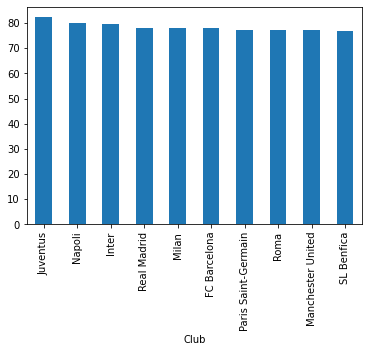

In [42]:
#displaying average overall rating of top 10 clubs
df_joincol.groupby('Club')['Overall'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

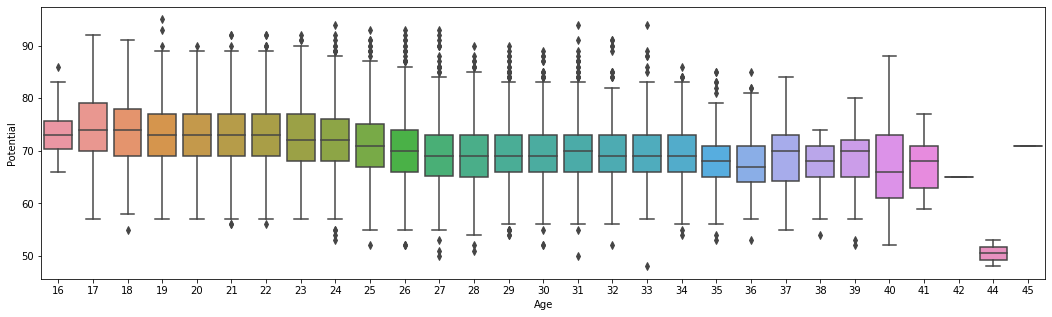

In [43]:
#visualize relationship between age and individual potential
plt.figure(figsize=(18, 5))
sns.boxplot(df['Age'], df['Potential'])
plt.show()

1. Age is inversely proportional to the individual potential.
2. The peak of potential is at age 17 and the maximum potential is at age 19 as an outlier.
3. In some cases we can observe that potential is higher for higher age in the form of outlier.

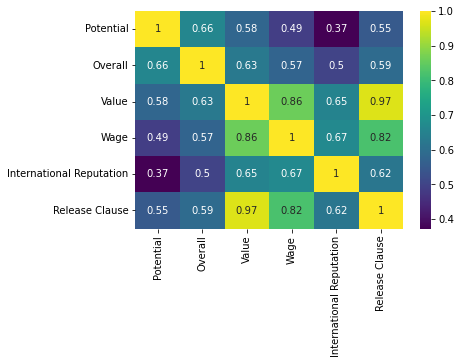

In [44]:
#features that directly contribute to the wages of the player
imp_ft = df[['Potential', 'Overall', 'Value', 'Wage', 'International Reputation', 'Release Clause']]

sns.heatmap(imp_ft.corr(), annot=True, cmap='viridis')
plt.show()

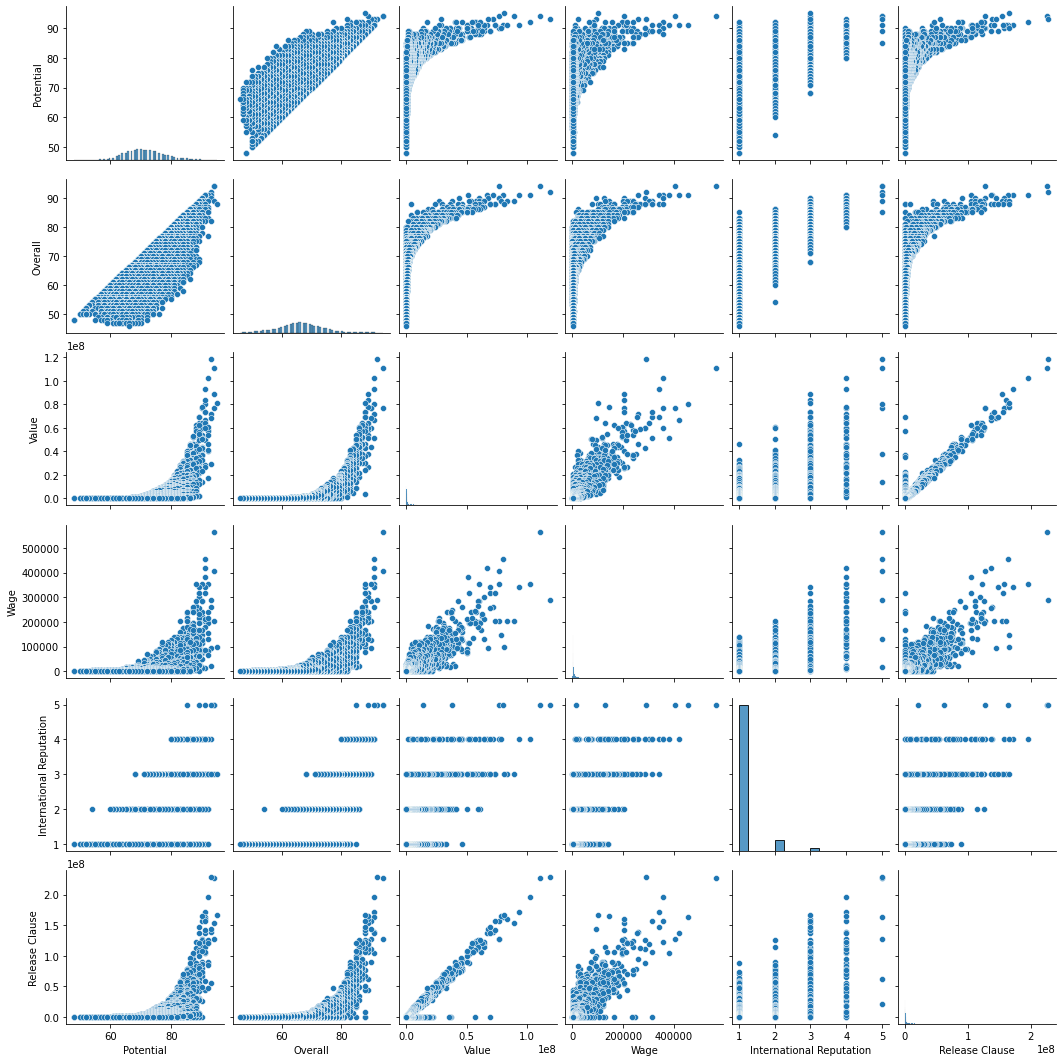

In [45]:
sns.pairplot(imp_ft)
plt.show()

1. We can see that Potential, Overall, Value, International Reputation, Release Clause are highly contributed to Wages.
2. As any of the rest columns value increase their is significant increase in wages.

In [46]:
#position where max no. of player palyed
df['Position'].value_counts().sort_values(ascending=False).head(1)

ST    2212
Name: Position, dtype: int64

In [47]:
#position where min no. of players played
df['Position'].value_counts().sort_values(ascending=True).head(1)

LF    15
Name: Position, dtype: int64

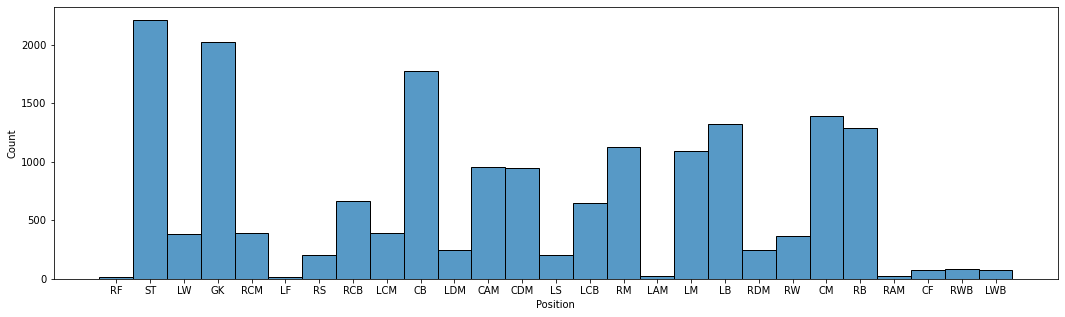

In [48]:
#plot 
plt.figure(figsize=(18, 5))
sns.histplot(df['Position'])
plt.show()

1. Max. no. of players played at Striker(ST) position i.e, 2212.
2. Min. no. of players played at Left Forward(LF) position i.e, 15

In [49]:
df[ (df['Club'] == 'Juventus') & (df['Wage'] > 200000)].head(3)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,High/ Low,ST,2018,2022-01-01,6.2,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
15,211110,P. Dybala,24,Argentina,89,94,Juventus,89000000.0,205000.0,Left,3.0,3.0,4.0,High/ Medium,LF,2015,2022-01-01,5.1,165.0,82.0,84.0,68.0,87.0,88.0,92.0,88.0,88.0,75.0,92.0,87.0,83.0,91.0,86.0,85.0,82.0,75.0,80.0,65.0,88.0,48.0,32.0,84.0,87.0,86.0,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,153500000.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,4.0,3.0,2.0,Medium/ High,LCB,2005,2020-01-01,6.2,187.0,58.0,33.0,83.0,59.0,45.0,58.0,60.0,31.0,59.0,57.0,63.0,75.0,54.0,82.0,55.0,78.0,89.0,65.0,89.0,49.0,92.0,88.0,28.0,50.0,50.0,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0


In [50]:
#top 5 players based on their overall rating in each unique positions
top5 = df.groupby('Position').apply(lambda x: x.sort_values('Overall', ascending=False).head(5))
top5.head(10)

ID             Name  Age Nationality  Overall  Potential  \
Position                                                                     
CAM      17   194765     A. Griezmann   27      France       89         90   
         31   190460       C. Eriksen   26     Denmark       88         91   
         61   201942  Roberto Firmino   26      Brazil       86         87   
         66   189596        T. Müller   28     Germany       86         86   
         74   176635          M. Özil   29     Germany       86         86   
CB       12   182493         D. Godín   32     Uruguay       90         90   
         42   205600        S. Umtiti   24      France       87         92   
         73   177509       M. Benatia   31     Morocco       86         86   
         89   192366      N. Otamendi   30   Argentina       85         85   
         102  171919            Naldo   35      Brazil       85         85   

                           Club       Value      Wage Preferred Foot  \
Position                                                               
CAM      17     Atlético Madrid  78000000.0  145000.0           Left   
         31   Tottenham Hotspur  73500000.0  205000.0          Right   
         61           Liverpool  53000000.0  195000.0          Right   
         66   FC Bayern München  45000000.0  135000.0          Right   
         74             Arsenal  43500000.0  190000.0           Left   
CB       12     Atlético Madrid  44000000.0  125000.0          Right   
         42        FC Barcelona  57000000.0  205000.0           Left   
         73            Juventus  30000000.0  160000.0          Right   
         89     Manchester City  28500000.0  170000.0          Right   
         102      FC Schalke 04   9000000.0   38000.0          Right   

              International Reputation  Weak Foot  Skill Moves  \
Position                                                         
CAM      17                        4.0        3.0          4.0   
         31                        3.0        5.0          4.0   
         61                        3.0        4.0          4.0   
         66                        4.0        4.0          3.0   
         74                        4.0        2.0          4.0   
CB       12                        3.0        3.0          2.0   
         42                        3.0        3.0          2.0   
         73                        3.0        3.0          2.0   
         89                        3.0        3.0          2.0   
         102                       3.0        4.0          2.0   

                   Work Rate Position  Joined Contract Valid Until  Height  \
Position                                                                     
CAM      17       High/ High      CAM    2014           2023-01-01    5.90   
         31     High/ Medium      CAM    2013           2020-01-01    5.11   
         61       High/ High      CAM    2015           2023-01-01    5.11   
         66       High/ High      CAM    2008           2021-01-01    6.10   
         74      Medium/ Low      CAM    2013           2021-01-01    5.11   
CB       12     Medium/ High       CB    2010           2019-01-01    6.20   
         42     Medium/ High       CB    2016           2023-01-01    6.00   
         73     Medium/ High       CB    2014           2020-01-01    6.20   
         89       High/ High       CB    2015           2022-01-01    6.00   
         102  Medium/ Medium       CB    2016           2020-01-01    6.60   

              Weight  Crossing  Finishing  HeadingAccuracy  ShortPassing  \
Position                                                                   
CAM      17    161.0      82.0       90.0             84.0          83.0   
         31    168.0      88.0       80.0             52.0          91.0   
         61    168.0      72.0       87.0             77.0          86.0   
         66    165.0      79.0       87.0             82.0          83.0   
         74    168.0      83.0

In [51]:
#average wage for top 5 players of each position
top5['Wage'].groupby('Position').mean()

Position
CAM    174000.0
CB     139600.0
CDM    217000.0
CF      47400.0
CM     130600.0
GK     192800.0
LAM     81600.0
LB     177200.0
LCB    162000.0
LCM    184400.0
LDM    126600.0
LF     121200.0
LM     164600.0
LS     130200.0
LW     261000.0
LWB     34200.0
RAM     45400.0
RB     155400.0
RCB    231000.0
RCM    240800.0
RDM    105000.0
RF     148000.0
RM     131400.0
RS     132200.0
RW     202000.0
RWB     44200.0
ST     294000.0
Name: Wage, dtype: float64